In [1]:
import autoroot
from typing import Optional, Callable
import toolz 
import functools as ft
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm.auto as tqdm
from rastervision.core.data import RasterioSource, XarraySource
import xarray as xr
import rioxarray

sns.reset_defaults()
sns.set_context(context="talk", font_scale=0.7)

%matplotlib inline
%load_ext autoreload
%autoreload 2

/opt/anaconda3/envs/iti-env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
example_file = "/Users/anna.jungbluth/Desktop/git/rs_tools/data/terra/analysis/20181001154500_patch_8.nc"

In [44]:
ds = xr.open_dataset(example_file)

In [45]:
ds

<xarray.Dataset>
Dimensions:          (band_wavelength: 38, time: 1, y: 256, x: 256, band: 38)
Coordinates:
  * band_wavelength  (band_wavelength) float64 0.645 0.8585 ... 13.94 14.23
  * time             (time) object '2018-10-01 15:45'
    latitude         (y, x) float32 ...
    longitude        (y, x) float32 ...
  * band             (band) object '1' '2' '3' '4' ... '35' '36' '13hi' '14hi'
    cloud_mask       (y, x) float32 ...
Dimensions without coordinates: y, x
Data variables:
    Rad              (band_wavelength, time, band, y, x) float32 ...

In [46]:
ds = ds.squeeze('time')

In [47]:
ds

<xarray.Dataset>
Dimensions:          (band_wavelength: 38, y: 256, x: 256, band: 38)
Coordinates:
  * band_wavelength  (band_wavelength) float64 0.645 0.8585 ... 13.94 14.23
    time             <U16 '2018-10-01 15:45'
    latitude         (y, x) float32 ...
    longitude        (y, x) float32 ...
  * band             (band) object '1' '2' '3' '4' ... '35' '36' '13hi' '14hi'
    cloud_mask       (y, x) float32 ...
Dimensions without coordinates: y, x
Data variables:
    Rad              (band_wavelength, band, y, x) float32 ...

In [33]:
ds = ds.drop('band_wavelength')
ds = ds.drop('time')

In [38]:
da = ds.Rad

In [43]:
da

<xarray.DataArray 'Rad' (band_wavelength: 38, time: 1, band: 38, y: 256, x: 256)>
array([[[[[249.30768 , ...,  19.508509],
          ...,
          [352.51962 , ..., 115.91717 ]],

         ...,

         [[       nan, ...,  17.807762],
          ...,
          [       nan, ...,        nan]]]],



       ...,



       [[[[249.30768 , ...,  19.508509],
          ...,
          [352.51962 , ..., 115.91717 ]],

         ...,

         [[       nan, ...,  17.807762],
          ...,
          [       nan, ...,        nan]]]]], dtype=float32)
Coordinates:
    latitude    (y, x) float32 ...
    longitude   (y, x) float32 ...
  * band        (band) object '1' '2' '3' '4' '5' ... '35' '36' '13hi' '14hi'
    cloud_mask  (y, x) float32 ...
Dimensions without coordinates: band_wavelength, time, y, x
Attributes:
    grid_mapping:  spatial_ref

In [13]:
ds.sel(band='1').Rad.values.shape

(38, 1, 256, 256)

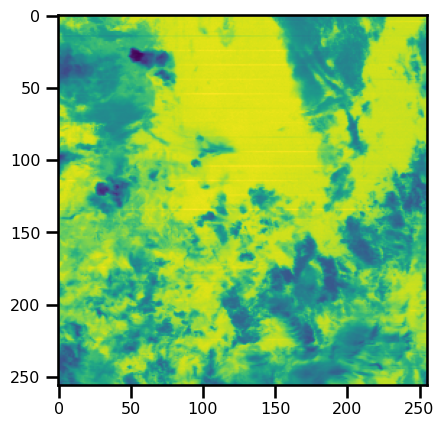

In [18]:
plt.imshow(ds.sel(band='33').Rad.values[0, 0, :]) # Why does this look so strange?

In [2]:
example_file_np = "/Users/anna.jungbluth/Desktop/git/rs_tools/data/terra/analysis/20181001154500_radiance_patch_13.npy"

In [3]:
np_data = np.load(example_file_np)

In [5]:
np_data.shape

(1, 256, 256)

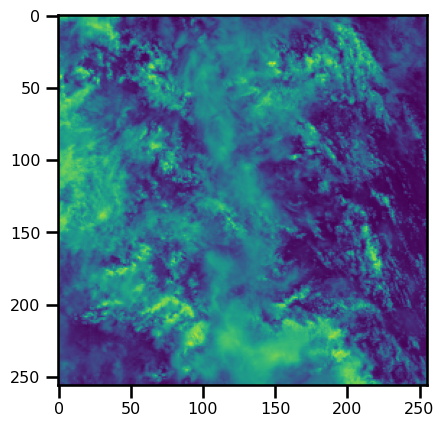

In [6]:
plt.imshow(np_data[0, :, :])